In [247]:
import pandas_datareader.data as web
from fredapi import Fred

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import hstack
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import warnings
import os

warnings.filterwarnings('ignore')

import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import pmdarima as pm
from pmdarima import model_selection

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

%matplotlib inline

In [3]:
start = datetime(2000,2,1)
end = datetime.now()

In [4]:
AMT = web.DataReader('AMT', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
AMT.index = pd.to_datetime(AMT.index)
AMT = AMT.resample('MS').mean()
AMT['name'] = pd.Series()
AMT['name'] = 'AMT'


ELS = web.DataReader('ELS', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
ELS.index = pd.to_datetime(ELS.index)
ELS = ELS.resample('MS').mean()
ELS['name'] = pd.Series()
ELS['name'] = 'ELS'


PLD = web.DataReader('PLD', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
PLD.index = pd.to_datetime(PLD.index)
PLD = PLD.resample('MS').mean()
PLD['name'] = pd.Series()
PLD['name'] = 'PLD'


FR = web.DataReader('FR', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
FR.index = pd.to_datetime(FR.index)
FR = FR.resample('MS').mean()
FR['name'] = pd.Series()
FR['name'] = 'FR'

In [5]:
MAA = web.DataReader('MAA', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
MAA.index = pd.to_datetime(MAA.index)
MAA = MAA.resample('MS').mean()
MAA['name'] = pd.Series()
MAA['name'] = 'MAA'

SUI = web.DataReader('SUI', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
SUI.index = pd.to_datetime(SUI.index)
SUI = SUI.resample('MS').mean()
SUI['name'] = pd.Series()
SUI['name'] = 'SUI'

BXMT = web.DataReader('BXMT', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
BXMT.index = pd.to_datetime(BXMT.index)
BXMT = BXMT.resample('MS').mean()
BXMT['name'] = pd.Series()
BXMT['name'] = 'BXMT'

RHP = web.DataReader('RHP', 'av-daily', start = start, end = end, api_key = 'Y8YQFOIVHPA381U4')
RHP.index = pd.to_datetime(RHP.index)
RHP = RHP.resample('MS').mean()
RHP['name'] = pd.Series()
RHP['name'] = 'RHP'

In [6]:
reit_df_list = [AMT, ELS, PLD, FR, MAA, SUI, BXMT, RHP]
for reit in reit_df_list:
    reit['mid'] = (reit['high'] + reit['low'])/2
    reit['daily lag'] = reit['close'].shift(1)
    reit['daily returns'] = (reit['daily lag']/reit['close']) - 1

In [7]:
all_reits_df = AMT.append(reit_df_list[1:])

In [253]:
reit_df_name_list = ['AMT', 'ELS', 'PLD', 'FR', 'MAA', 'SUI', 'BXMT', 'RHP']
reit_df_dict = {}

for name in reit_df_name_list:
    df = all_reits_df.loc[all_reits_df.name == name]
    reit_df_dict[name] = df
    
    

In [9]:
def plot_return_distributions(df_dict):
    for key in df_dict.keys():
        plt.style.use('ggplot')
        df_dict[key]['daily returns'].hist(bins = 25)
        plt.title(f'{key} Daily Return Histogram')
        plt.xlim(left = df_dict[key]['daily returns'].min() - 0.5, right = df_dict[key]['daily returns'].max() + 0.5)
        plt.tight_layout()
        plt.show();

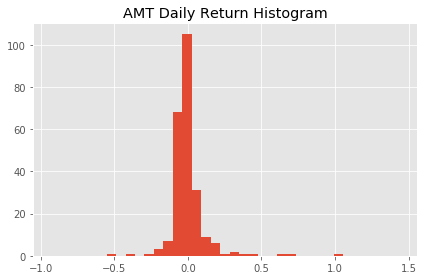

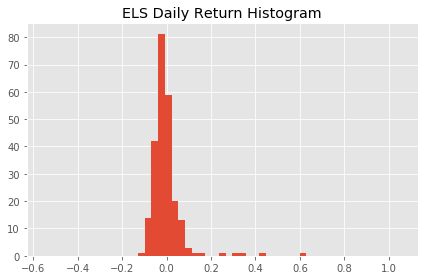

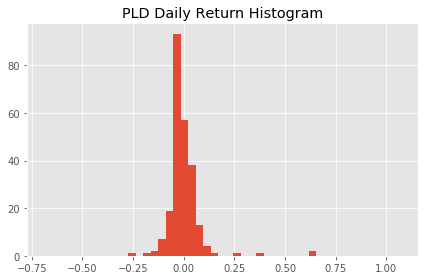

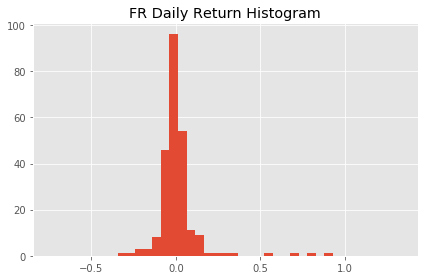

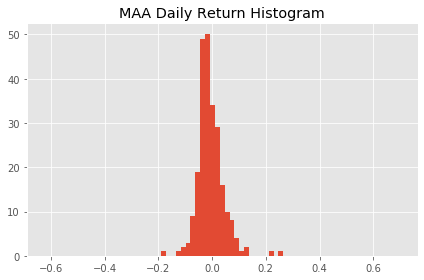

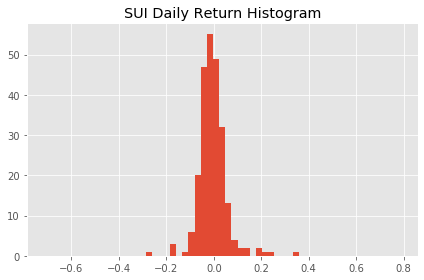

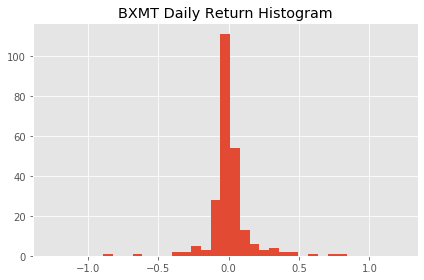

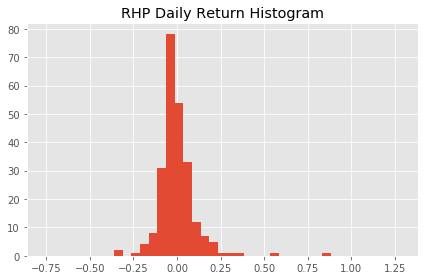

In [10]:
plot_return_distributions(reit_df_dict)

In [197]:
reit_df_dict['AMT'].loc[(np.abs(stats.zscore(reit_df_dict['AMT']['mid'])) > 3)]

,open,high,low,close,volume,name,mid,daily lag,daily returns
2020-01-01,232.44381,234.25309,230.898843,232.614286,1.490332e+06,AMT,232.575967,218.256190,-0.061725
2020-02-01,233.70000,236.63000,232.564150,235.760000,1.332956e+06,AMT,234.597075,232.614286,-0.013343


In [251]:
slice_dict = {}
for key in reit_df_dict.keys():
    slice1 = reit_df_dict[key].loc['2000':'2006']
    slice2 = reit_df_dict[key].loc['2006':'2012']
    slice3 = reit_df_dict[key].loc['2013':'2016']
    slice4 = reit_df_dict[key].loc['2017':'2020']
    slice_dict[key] = [slice1, slice2, slice3, slice4]
    

In [242]:
slice_dict['AMT'][0]

,open,high,low,close,volume,name,mid,daily lag,daily returns
2000-02-01,42.721053,44.060526,41.801579,43.113158,1.234258e+06,AMT,42.931053,NaN,NaN
2000-03-01,50.527391,51.884348,48.349130,50.368696,1.178487e+06,AMT,50.116739,43.113158,-0.144049
2000-04-01,44.878947,45.806842,43.080526,44.750526,8.261263e+05,AMT,44.443684,50.368696,0.125544
2000-05-01,42.674091,43.280455,41.087273,42.020455,9.057091e+05,AMT,42.183864,44.750526,0.064970
2000-06-01,41.427727,42.189545,40.740455,41.512727,7.066318e+05,AMT,41.465000,42.020455,0.012231
2000-07-01,44.505000,45.280500,43.629500,44.511500,8.844200e+05,AMT,44.455000,41.512727,-0.067371
2000-08-01,42.849130,43.457826,41.897826,42.634348,1.081065e+06,AMT,42.677826,44.511500,0.044029
2000-09-01,35.241500,36.091500,34.185500,35.330500,1.346895e+06,AMT,35.138500,42.634348,0.206729
2000-10-01,36.041818,36.996818,34.947727,36.300000,1.059641e+06,AMT,35.972273,35.330500,-0.026708
2000-11-01,37.453333,37.966190,35.937143,36.846667,7.319476e+05,AMT,36.951667,36.300000,-0.014836


In [236]:
outliers_df_dict = {}
for key in slice_dict.keys():
    slice1 = slice_dict[key][0].loc[(np.abs(stats.zscore(slice_dict[key][0]['mid'])) > 2.5)]
    slice2 = slice_dict[key][1].loc[(np.abs(stats.zscore(slice_dict[key][1]['mid'])) > 2.5)]
    slice3 = slice_dict[key][2].loc[(np.abs(stats.zscore(slice_dict[key][2]['mid'])) > 2.5)]
    slice4 = slice_dict[key][3].loc[(np.abs(stats.zscore(slice_dict[key][3]['mid'])) > 2.5)]
    outliers_df_dict[key] = pd.concat([slice1, slice2, slice3, slice4])

In [243]:
outliers_df_dict['PLD']

,open,high,low,close,volume,name,mid,daily lag,daily returns
2016-08-01,53.77087,54.071043,53.358039,53.740435,2.299540e+06,PLD,53.714541,51.25,-0.046342
